In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import astropy.units as u
import astropy.coordinates as coord
from sklearn.neighbors import KDTree

from astropy.table import Table
import sys
# sys.path.append('/Users/james/python/qthist2d/')
# from qthist2d import qthist, qtcount


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
# starting from 
# https://github.com/jradavenport/lonely_stars/blob/main/GCNS_KDTree.ipynb
GCNS_file = '../lonely_stars/GCNS_cat.fits'
GCNS = Table.read(GCNS_file, format='fits')


# for comparison: solar gaia colors (based on DR1)
# https://arxiv.org/abs/1806.01953

In [10]:
GCNS.columns

<TableColumns names=('SOURCE_ID','RA','RA_ERROR','DEC','DEC_ERROR','PARALLAX','PARALLAX_ERROR','PMRA','PMRA_ERROR','PMDEC','PMDEC_ERROR','PHOT_G_MEAN_MAG','PHOT_G_MEAN_FLUX_OVER_ERROR','PHOT_BP_MEAN_MAG','PHOT_BP_MEAN_FLUX_OVER_ERROR','PHOT_RP_MEAN_MAG','PHOT_RP_MEAN_FLUX_OVER_ERROR','PHOT_BP_RP_EXCESS_FACTOR','RUWE','IPD_FRAC_MULTI_PEAK','ADOPTEDRV','ADOPTEDRV_ERROR','ADOPTEDRV_REFNAME','RADIAL_VELOCITY_IS_VALID','GCNS_PROB','WD_PROB','DIST_1','DIST_16','DIST_50','DIST_84','XCOORD_50','XCOORD_16','XCOORD_84','YCOORD_50','YCOORD_16','YCOORD_84','ZCOORD_50','ZCOORD_16','ZCOORD_84','UVEL_50','UVEL_16','UVEL_84','VVEL_50','VVEL_16','VVEL_84','WVEL_50','WVEL_16','WVEL_84','NAME_GUNN','REFNAME_GUNN','GMAG_GUNN','E_GMAG_GUNN','RMAG_GUNN','E_RMAG_GUNN','IMAG_GUNN','E_IMAG_GUNN','ZMAG_GUNN','E_ZMAG_GUNN','NAME_2MASS','J_M_2MASS','J_MSIG_2MASS','H_M_2MASS','H_MSIG_2MASS','K_M_2MASS','K_MSIG_2MASS','NAME_WISE','W1MPRO_PM_WISE','W1SIGMPRO_PM_WISE','W2MPRO_PM_WISE','W2SIGMPRO_PM_WISE','W3MPRO_WISE

294681


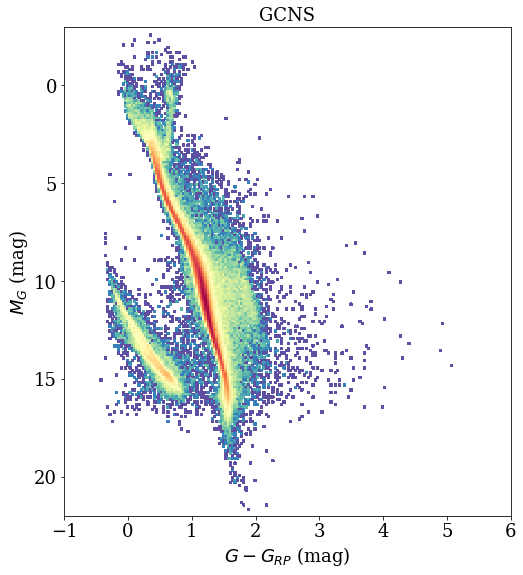

In [29]:
aok = np.where(np.isfinite(GCNS['PHOT_BP_MEAN_MAG']) & # finite magnitudes
               (GCNS['DIST_50'] > 0) & # distance > 0
               (GCNS['DIST_50'] < 0.1) # dist < 100pc
              )[0]

print(np.size(aok))

plt.figure(figsize=(8,9))
_ = plt.hist2d(GCNS['PHOT_G_MEAN_MAG'][aok] - GCNS['PHOT_RP_MEAN_MAG'][aok], 
               GCNS['PHOT_G_MEAN_MAG'][aok] - 5.*np.log10(1000*GCNS['DIST_50'][aok])+5, 
               bins=200, cmap=plt.cm.Spectral_r, 
               norm=LogNorm(), range=[[-1,6],[-3,22]]
              )

plt.gca().invert_yaxis()

plt.xlabel('$G - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('GCNS',fontsize=18)
plt.savefig('GCNS_CMD1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

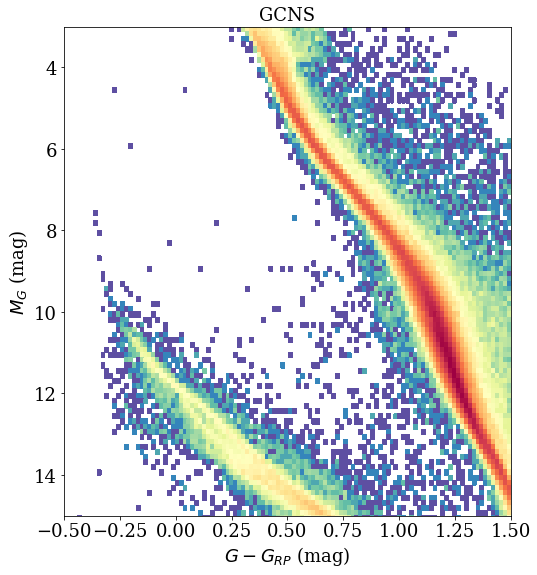

In [30]:
plt.figure(figsize=(8,9))
_ = plt.hist2d(GCNS['PHOT_G_MEAN_MAG'][aok] - GCNS['PHOT_RP_MEAN_MAG'][aok], 
               GCNS['PHOT_G_MEAN_MAG'][aok] - 5.*np.log10(1000*GCNS['DIST_50'][aok])+5, 
               bins=(400,200), cmap=plt.cm.Spectral_r, 
               norm=LogNorm(), range=[[-1,6],[-3,22]]
              )

plt.gca().invert_yaxis()

plt.xlabel('$G - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('GCNS',fontsize=18)
plt.xlim(-0.5,1.5)
plt.ylim(15,3)

plt.savefig('GCNS_CMD2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [44]:
ox = np.where((GCNS['SOURCE_ID'][aok] == 3183166667278838656))[0]
ox

array([60735])

(17.0, -3.0)

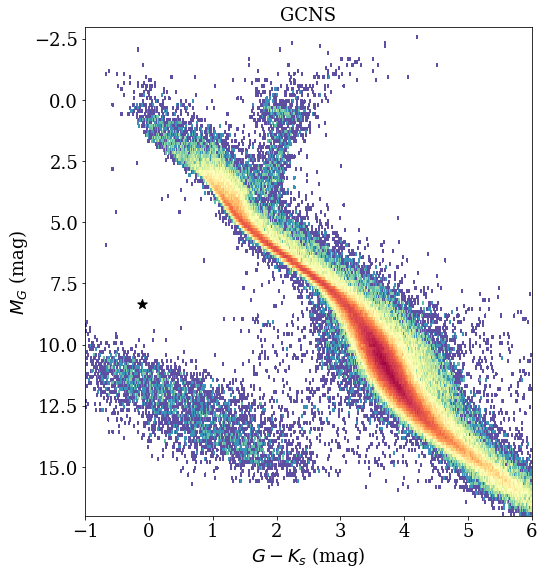

In [46]:
plt.figure(figsize=(8,9))
_ = plt.hist2d(GCNS['PHOT_G_MEAN_MAG'][aok] - GCNS['K_M_2MASS'][aok], 
               GCNS['PHOT_G_MEAN_MAG'][aok] - 5.*np.log10(1000*GCNS['DIST_50'][aok])+5, 
               bins=(400,200), cmap=plt.cm.Spectral_r, 
               norm=LogNorm(), range=[[-1,6],[-3,22]]
              )

plt.scatter(GCNS['PHOT_G_MEAN_MAG'][aok][ox] - GCNS['K_M_2MASS'][aok][ox], 
               GCNS['PHOT_G_MEAN_MAG'][aok][ox] - 5.*np.log10(1000*GCNS['DIST_50'][aok][ox])+5, 
           marker='*', c='k', s=100)

plt.gca().invert_yaxis()

plt.xlabel('$G - K_{s}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('GCNS',fontsize=18)
# plt.xlim(-1,5)
plt.ylim(17,-3)

# plt.savefig('GCNS_CMD3.png', dpi=150, bbox_inches='tight', pad_inches=0.25)